In [1]:
import pandas as pd

# ===================== 1. 데이터 로드 =====================
# CSV 파일을 읽어와 데이터프레임 생성
file_path = '../data/customer_data.csv'  # 파일 경로 지정
customer_data = pd.read_csv(file_path)  # CSV 파일 로드


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       899 non-null    int64  
 1   Age              899 non-null    float64
 2   AnnualIncome     899 non-null    float64
 3   SpendingScore    899 non-null    int64  
 4   PurchaseHistory  899 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 42.1 KB


In [2]:
customer_data.shape

(1000, 5)

In [3]:
# ===================== 3. 결측치 처리 =====================
# dropna(): 결측치(NaN)가 있는 행을 제거하여 데이터 정제
customer_data = customer_data.dropna()

# 결측치 제거 후 데이터 크기 출력
print(f"결측치 제거 후 데이터셋 크기: {customer_data.shape}")  
# shape: (행, 열) 형태의 데이터 크기 출력

결측치 제거 후 데이터셋 크기: (900, 5)


In [4]:
# ===================== 4. 이상치 탐지 및 처리 =====================
# 이상치를 탐지하기 위해 IQR(Interquartile Range, 사분위 범위) 방법 사용
for column in ['Age', 'AnnualIncome']:  # 이상치를 탐지할 컬럼 선택
    Q1 = customer_data[column].quantile(0.25)  # 1사분위(Q1, 25% 지점)
    Q3 = customer_data[column].quantile(0.75)  # 3사분위(Q3, 75% 지점)
    IQR = Q3 - Q1  # 사분위 범위 (IQR = Q3 - Q1)

    # 이상치 경계값 설정
    lower_bound = Q1 - 1.5 * IQR  # 하한값: Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  # 상한값: Q3 + 1.5 * IQR

    # 기존 데이터 크기 저장
    initial_shape = customer_data.shape  

    # 이상치를 제거한 데이터프레임 생성 (lower_bound보다 크거나 upper_bound보다 작은 데이터만 남김)
    customer_data = customer_data[(customer_data[column]> lower_bound) & (customer_data[column] < upper_bound)]

    # 이상치 처리 전후 데이터 크기 출력
    print(f"{column} 이상치 처리 전후 데이터셋 크기: {initial_shape} -> {customer_data.shape}")

Age 이상치 처리 전후 데이터셋 크기: (900, 5) -> (899, 5)
AnnualIncome 이상치 처리 전후 데이터셋 크기: (899, 5) -> (899, 5)


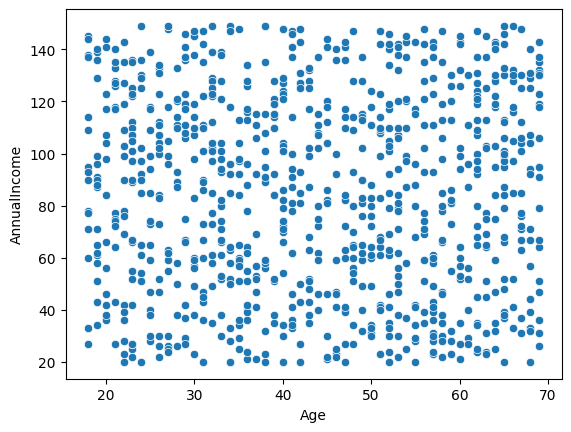

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=customer_data, x='Age', y='AnnualIncome')
plt.show()